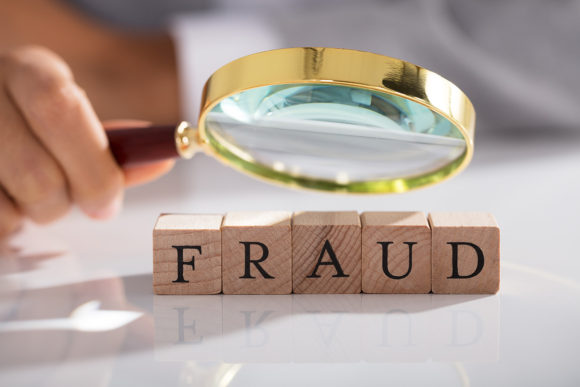

<hr  color='#01FF70'>
<hr color='blue'>
<h1><b><font 
color='Aqua'><center>Detection of Conversion fraud in 
Digital Advertising</center></font></b></h1>

<hr color='blue'>
<hr color='#01FF70'>

<h4><font color=' #d0bdf4'>importing necessary modules</font><h4>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<hr color='blue'>
<h2><font color='#01FF70'><center>Analysis of Train Data</center></font><h2>
<hr color='blue'>

<h4><font color=' #d0bdf4'>reading csv for train data</font><h4>

In [ ]:
train_data=pd.read_csv("../input/cg2021/Training Data.csv")
train_data

In [ ]:
train_data.info()

In [ ]:
train_data.describe()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(train_data['clientid_cr'], train_data['adslotdimid_cr'])
ax.set_xlabel('Client ID')
ax.set_ylabel('Adslotdim ID')

In [ ]:
sns.countplot(train_data['adLogType_cr'])

In [ ]:
sns.countplot(train_data['pricingtype_cr'])

In [ ]:
sns.countplot(train_data['lookUpFrom_cr'])

In [ ]:
sns.distplot(x = train_data['spend_cr'], bins = 10)

In [ ]:
sns.distplot(x = train_data['pricingtype_cr'], bins = 10)  

In [ ]:
sns.countplot(train_data['conversion_fraud'])

In [ ]:
sns.boxplot(y = train_data['spend_cr'], x = train_data['conversion_fraud'])

In [ ]:
train_data['conversion_fraud'].value_counts()

In [ ]:
u = np.array([834,131])
mylabels = ["False", "True"]
plt.pie(u, labels = mylabels)
plt.show() 

<h4><font color=' #d0bdf4'>missing value check by heat map
</font><h4>

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(train_data.isnull(),cbar=False,cmap='viridis',ax=ax)

In [ ]:
train_data['audiences_cr'].value_counts()

<hr color='blue'>
<h2><font color='#01FF70'><center>working on click log</center></font><h2>
<hr color='blue'>

In [ ]:
click_log_data=pd.read_csv("../input/cg2021/click_log.csv")
click_log_data.head()

In [ ]:
click_log_data.info()

In [ ]:
click_log_data.describe()

<h4><font color=' #d0bdf4'>missing value check by heat map
</font><h4>

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(click_log_data.isnull(),cbar=False,cmap='viridis',ax=ax)

<hr color='blue'>
<h2><font color='#01FF70'><center>join train data</center></font><h2>
<hr color='blue'>

In [ ]:
click_log_data.rename(columns={'imprId':'imprid_cr'},inplace=True)

<h4><font color=' #d0bdf4'>removing dupliacted from click log column imprid_cr
</font><h4>

In [ ]:
click_log_data_without_duplicate=click_log_data.drop_duplicates(subset='imprid_cr', keep="last")

In [ ]:
final_train_data=pd.merge(train_data,click_log_data_without_duplicate,on='imprid_cr',how='left')

<h4><font color=' #d0bdf4'>missing value check by heat map
</font><h4>

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(final_train_data.isnull(),cbar=False,cmap='viridis',ax=ax)

<hr color='blue'>
<h2><font color='#01FF70'><center>Analysis of Test data</center></font><h2>
<hr color='blue'>

In [ ]:
test_data=pd.read_csv("../input/cg2021/Test Data.csv")
test_data.info()

In [ ]:
test_data

In [ ]:
fig, ax = plt.subplots()
ax.scatter(test_data['clientid_cr'], test_data['adslotdimid_cr'])
ax.set_xlabel('Client ID')
ax.set_ylabel('Adslotdim ID')

In [ ]:
sns.countplot(test_data['adLogType_cr'])

In [ ]:
sns.countplot(test_data['pricingtype_cr'])

In [ ]:
sns.countplot(test_data['lookUpFrom_cr'])

In [ ]:
sns.distplot(x = test_data['spend_cr'], bins = 10)

In [ ]:
sns.distplot(x = test_data['pricingtype_cr'], bins = 10)  

In [ ]:
test_data['pricingtype_cr'].value_counts()

In [ ]:
u = np.array([336,80,39])
mylabels = ["pricingtype_6", "pricingtype_16","pricingtype_17"]
plt.pie(u, labels = mylabels)
plt.show() 

<h4><font color=' #d0bdf4'>missing value check by heat map
</font><h4>

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(test_data.isnull(),cbar=False,cmap='viridis',ax=ax)

<hr color='blue'>
<h2><font color='#01FF70'><center>Join Test data</center></font><h2>
<hr color='blue'>

In [ ]:
final_test_data=pd.merge(test_data,click_log_data_without_duplicate,on='imprid_cr',how='left')

<h4><font color=' #d0bdf4'>missing value check by heat map
</font><h4>

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(final_test_data.isnull(),cbar=False,cmap='viridis',ax=ax)

<hr color='blue'>
<h2><font color='#01FF70'><center>working on data</center></font><h2>
<hr color='blue'>

In [ ]:
final_train_data.info()

<h4><font color=' #d0bdf4'>Checking correlation if any exists
</font><h4>

In [ ]:
corr=final_train_data.corr()

sns.heatmap(corr)

In [ ]:
final_train_data.isnull().sum()

In [ ]:
final_train_data=final_train_data.drop_duplicates()

In [ ]:
final_test_data=final_test_data.drop_duplicates()

In [ ]:
final_test_data.info()

<h4><font color=' #d0bdf4'>Checking correlation if any exists
</font><h4>

In [ ]:
corr=final_test_data.corr()
sns.heatmap(corr)

<h4><font color=' #d0bdf4'>Checking For Null Values if any Present
</font><h4>

In [ ]:
final_test_data.isnull().sum()

In [ ]:
final_train_data=final_train_data.filter(['record_id','clientid_cr','pubclientid_cr','clickIp','clmbuserid_cr','imprid_cr','siteId_cr','goalid_cr','cityId_cr','stateId_cr','countryDimId_cr','browserId_cr','adslotdimid_cr','crtd','itmClmbLId','ispDimId_cr','devTypeDimId','osVerDimId_cr','conversion_fraud']).copy()

In [ ]:
final_train_data.info()

In [ ]:
final_test_data=final_test_data.filter(['record_id','clientid_cr','pubclientid_cr','clickIp','clmbuserid_cr','imprid_cr','siteId_cr','goalid_cr','cityId_cr','stateId_cr','countryDimId_cr','browserId_cr','adslotdimid_cr','crtd','itmClmbLId','ispDimId_cr','devTypeDimId','osVerDimId_cr']).copy()

In [ ]:
final_test_data.info()

<h4><font color=' #d0bdf4'>outliar checking  by boxplot
</font><h4>

In [ ]:
plt.figure(figsize=(25, 9))
p=final_train_data.drop(["crtd",'itmClmbLId'],axis=1)
sns.boxplot(data=p)

<h4><font color=' #d0bdf4'>outliar checking  by boxplot
</font><h4>

In [ ]:
plt.figure(figsize=(25, 9))
p=final_test_data.drop(["crtd",'itmClmbLId'],axis=1)
sns.boxplot(data=p)

<hr color='blue'>
<h2><font color='#01FF70'><center>Preprocessing Train Data</center></font><h2>
<hr color='blue'>

In [ ]:
final_test_data['crtd'].value_counts()

In [ ]:
final_train_data['crtd'].value_counts()

<h4><font color=' #d0bdf4'>so we have to remove crtd from data as it will not affect modelas all values are same
</font><h4>

In [ ]:
final_train_data.drop(columns=['crtd'],inplace=True)

In [ ]:
final_train_data['itmClmbLId'].value_counts()

In [ ]:
#Encoding clickIp column by using ip address classes ip 0=<X<=127 belong to class A that is we enocde it by 0 ,according to same we encode others B,C,D,E by 1,2,3,4 and 5 means invalid ip address and 6 means ipv6 address.
temp=pd.DataFrame()
for j in final_train_data['clickIp']:
  if '.' in str(j):
    x=list(str(j).split('.'))
    if(int(x[0])>=0 and int(x[0])<=127):
      final_train_data['clickIp']=final_train_data['clickIp'].replace(j,0)
    elif(int(x[0])>=128 and int(x[0])<=191):
      final_train_data['clickIp']=final_train_data['clickIp'].replace(j,1)
    elif(int(x[0])>=192 and int(x[0])<=223):
      final_train_data['clickIp']=final_train_data['clickIp'].replace(j,2)
    elif(int(x[0])>=224 and int(x[0])<=239):
      final_train_data['clickIp']=final_train_data['clickIp'].replace(j,3)
    elif(int(x[0])>=240 and int(x[0])<=255):
      final_train_data['clickIp']=final_train_data['clickIp'].replace(j,4)
    else:
      final_train_data['clickIp']=final_train_data['clickIp'].replace(j,5)
  elif ':' in str(j):
    x=list(str(j).split(':'))
    final_train_data['clickIp']=final_train_data['clickIp'].replace(j,6)

<h4><font color=' #d0bdf4'>Encoding ip 144 that belongs to class B(i.e. 1)
</font><h4>

In [ ]:
final_train_data['clickIp']=final_train_data['clickIp'].replace('144',1)
print(len(final_train_data['clickIp']))
final_train_data['clickIp'].unique()
final_train_data['clickIp'].value_counts()

In [ ]:
len(final_train_data['clmbuserid_cr'].unique())

<h4><font color=' #d0bdf4'>Average Word Length Encoding:-We will also extract another feature which will calculate the average word length of each row in coulmn clmbuserid_cr . This can also potentially help us in improving our model.
we simply take the sum of the length of all the words and divide it by the total length of the the word:
</font><h4>

In [ ]:
def avg_word(sentence):
  words = sentence.split('-')
  return (sum(len(word) for word in words)/len(words))

final_train_data['avg_wordc'] = final_train_data['clmbuserid_cr'].apply(lambda x: avg_word(x))
final_train_data

<h4><font color=' #d0bdf4'>Average Word Length Encoding:-We will also extract another feature which will calculate the average word length of each row in coulmn clmbuserid_cr . This can also potentially help us in improving our model.
we simply take the sum of the length of all the words and divide it by the total length of the the word:
</font><h4>

In [ ]:
final_train_data['avg_wordi'] = final_train_data['imprid_cr'].apply(lambda x: avg_word(x))
final_train_data

<h4><font color=' #d0bdf4'>dropping imprid_cr clmbuserid_cr which are not encoded
</font><h4>

In [ ]:
final_train_data.drop(["imprid_cr","clmbuserid_cr"],axis=1,inplace=True)
final_train_data

In [ ]:
final_train_data.fillna(final_train_data.select_dtypes(include='number').mean().iloc[0], inplace=True)
final_train_data.fillna(final_train_data.select_dtypes(include='object').mode().iloc[0], inplace=True)
final_train_data['clickIp']

<hr color='blue'>
<h2><font color='#01FF70'><center>Preprocessing Test Data</center></font><h2>
<hr color='blue'>

In [ ]:
final_test_data.drop(columns=['crtd'],inplace=True)

In [ ]:
#Encoding clickIp column by using ip address classes ip 0=<X<=127 belong to class A that is we enocde it by 0 ,according to same we encode others B,C,D,E by 1,2,3,4 and 5 means invalid ip address and 6 means ipv6 address.
temp=pd.DataFrame()
for j in final_test_data['clickIp']:
  if '.' in str(j):
    x=list(str(j).split('.'))
    if(int(x[0])>=0 and int(x[0])<=127):
      final_test_data['clickIp']=final_test_data['clickIp'].replace(j,0)
    elif(int(x[0])>=128 and int(x[0])<=191):
      final_test_data['clickIp']=final_test_data['clickIp'].replace(j,1)
    elif(int(x[0])>=192 and int(x[0])<=223):
      final_test_data['clickIp']=final_test_data['clickIp'].replace(j,2)
    elif(int(x[0])>=224 and int(x[0])<=239):
      final_test_data['clickIp']=final_test_data['clickIp'].replace(j,3)
    elif(int(x[0])>=240 and int(x[0])<=255):
      final_test_data['clickIp']=final_test_data['clickIp'].replace(j,4)
    else:
      final_test_data['clickIp']=final_test_data['clickIp'].replace(j,5)
  elif ':' in str(j):
    x=list(str(j).split(':'))
    final_test_data['clickIp']=final_test_data['clickIp'].replace(j,6)

<h4><font color=' #d0bdf4'>Encoding ip 144 that belongs to class B(i.e. 1)
</font><h4>

In [ ]:
final_test_data['clickIp']=final_test_data['clickIp'].replace('144',1)
print(len(final_test_data['clickIp']))
final_test_data['clickIp'].unique()
final_test_data['clickIp'].value_counts()

<h4><font color=' #d0bdf4'>Average Word Length Encoding:-We will also extract another feature which will calculate the average word length of each row in coulmn clmbuserid_cr . This can also potentially help us in improving our model.
we simply take the sum of the length of all the words and divide it by the total length of the the word:
</font><h4>

In [ ]:
final_test_data['avg_wordc'] = final_test_data['clmbuserid_cr'].apply(lambda x: avg_word(x))
final_test_data

<h4><font color=' #d0bdf4'>Average Word Length Encoding:-We will also extract another feature which will calculate the average word length of each row in coulmn clmbuserid_cr . This can also potentially help us in improving our model.
we simply take the sum of the length of all the words and divide it by the total length of the the word:
</font><h4>

In [ ]:
final_test_data['avg_wordi'] = final_test_data['imprid_cr'].apply(lambda x: avg_word(x))
final_test_data

<h4><font color=' #d0bdf4'>dropping imprid_cr clmbuserid_cr which are not encoded
</font><h4>

In [ ]:
final_test_data.drop(["imprid_cr","clmbuserid_cr"],axis=1,inplace=True)
final_test_data['avg_wordc'].unique()

In [ ]:
final_test_data.fillna(final_test_data.select_dtypes(include='number').mean().iloc[0], inplace=True)
final_test_data.fillna(final_test_data.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [ ]:
final_test_data.isnull().sum()

<hr color='blue'>
<h2><font color='#01FF70'><center>Handling Missing Data</center></font><h2>
<hr color='blue'>

In [ ]:
final_train_data.isnull().sum()

<h4><font color=' #d0bdf4'>Splitting data for train and test
</font><h4>

In [ ]:
x_train=final_train_data.drop(columns=['conversion_fraud'])
y_train=final_train_data['conversion_fraud']
x_test=final_test_data.drop(columns=['record_id'])
x_test
y_train
x_test

In [ ]:
final_train_data['conversion_fraud'].value_counts()

<h4><font color=' #d0bdf4'>dataframe for storing results
</font><h4>

In [ ]:
dt=pd.DataFrame()
dt['record_id']=final_test_data['record_id']
dt['conversion_fraud']=final_train_data['conversion_fraud']
dt

<hr color='blue'>
<h2><font color='#01FF70'><center>Training Model and making prediction</center></font><h2>
<hr color='blue'>

<h4><font color=' #d0bdf4'>applying xgboost with hyper tuning 
</font><h4>

In [ ]:
import xgboost as xgb
xgb= xgb.XGBClassifier(learning_rate=0.2,max_depth=1,objective='binary:logistic')
xgb.fit(x_train, y_train)
xbt = xgb.predict(x_test)
dt["conversion_fraud"]=xbt
#imporing  dt to csv

dt.to_csv("xg_boost.csv",index=False)
dt['conversion_fraud'].value_counts()

<hr color='blue'>
<h2><font color='#01FF70'><center>Sample sub</center></font><h2>
<hr color='blue'>

In [ ]:
sub=pd.read_csv("../input/cg2021/sample_submission.csv")

In [ ]:
sub

In [ ]:
dt.to_csv("./Fraud_Detection.csv")
dt